In [126]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare, chi2
from sklearn.metrics import mean_squared_error
import math

In [143]:
# input data
x = np.array([-2, -1.5, -0.7, 0, 0.7, 2, 2.8, 3.5, 4.5, 5, 6])
y = np.array([-4, -2, -0.5, 1.5, 2, 1, -0.5, -2, -3, -4, -4.5])
x, y

(array([-2. , -1.5, -0.7,  0. ,  0.7,  2. ,  2.8,  3.5,  4.5,  5. ,  6. ]),
 array([-4. , -2. , -0.5,  1.5,  2. ,  1. , -0.5, -2. , -3. , -4. , -4.5]))

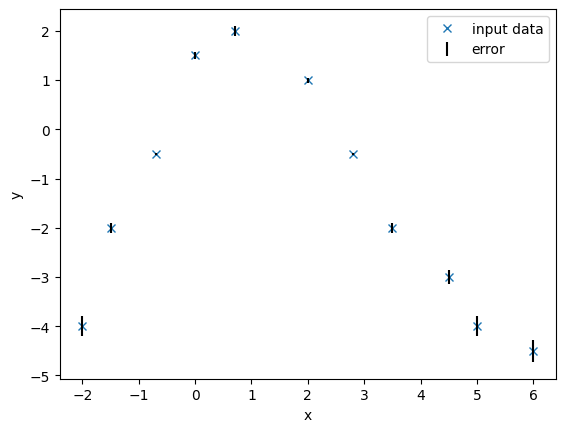

In [212]:
# plot of input data
plt.plot(x,y, "x", label="input data")
plt.errorbar(x, y, yerr = abs(y)*0.05, fmt="none", ecolor="black", label="error")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

In [15]:
# ch = np.polynomial.chebyshev.Chebyshev((1,2,3), domain=[-2,6], window=[-2,6])

In [189]:
def chi_sqd(o,e):
    s = 0
    for i in range(len(o)):
        s += (o[i]-e[i])**2/e[i]
    return s

In [195]:
chi_critical = chi2.ppf(1-.05, df=len(y))
print(chi_critical)
def cheb_coefs(degree):
    coefs, *rest = np.polynomial.chebyshev.chebfit(x,y,degree, full=True)
    print(rest[0][0])
    print(np.polynomial.chebyshev.Chebyshev(coefs))
    y_fit = np.polynomial.chebyshev.chebval(x, coefs)
#     print(y_fit.mean())
    chi_sq = chisquare(y,y_fit)
    print(mean_squared_error(y, y_fit)*len(y), chi_sq, "\n")
    return y_fit

19.67513757268249


In [196]:
cheb_coefs(2)

[10.43089369]
0.02242902422321967 + 0.8964902808840096·T₁(x) - 0.16085491719623057·T₂(x)
10.43089368978258 Power_divergenceResult(statistic=10.777098258260063, pvalue=0.37514585390349514) 



array([-2.89653596, -1.88529861, -0.60189707,  0.18328394,  0.65318932,
        0.68942517,  0.17125163, -0.61994555, -2.29713394, -3.37701051,
       -6.01932841])

[10.43089369]
0.02242902422321967 + 0.8964902808840096·T₁(x) - 0.16085491719623057·T₂(x)
10.43089368978258 Power_divergenceResult(statistic=10.777098258260063, pvalue=0.37514585390349514) 

[1.1141729]
0.9452603045652871 + 0.9900286725433324·T₁(x) - 0.3843257863863999·T₂(x) +
0.01871220277846432·T₃(x)
1.1141729032442125 Power_divergenceResult(statistic=2.2635945309850882, pvalue=0.9938915557922094) 



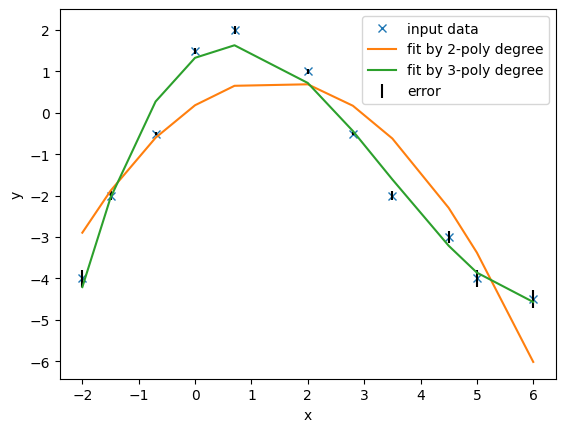

In [215]:
# plot
plt.plot(x,y, "x", label="input data")
plt.errorbar(x, y, yerr = abs(y)*0.05, fmt="none", ecolor="black", label="error")
for i in range(2, 4):
    plt.plot(x,cheb_coefs(i), label = f"fit by {i}-poly degree")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

[0.90173211]
0.8851795426231498 + 1.1401857566226896·T₁(x) -
0.36049360958347637·T₂(x) + 0.00760374248441813·T₃(x) +
0.0006968731270180404·T₄(x)
0.9017321085340757 Power_divergenceResult(statistic=3.473722166256365, pvalue=0.9679831001425558) 

[0.56079166]
0.9322830311850128 + 1.4156019086363247·T₁(x) -
0.41593673736815906·T₂(x) - 0.01333558138630035·T₃(x) +
0.005408124491446963·T₄(x) - 0.00023013610316154634·T₅(x)
0.5607916611100626 Power_divergenceResult(statistic=-2.985331658304545, pvalue=1.0) 



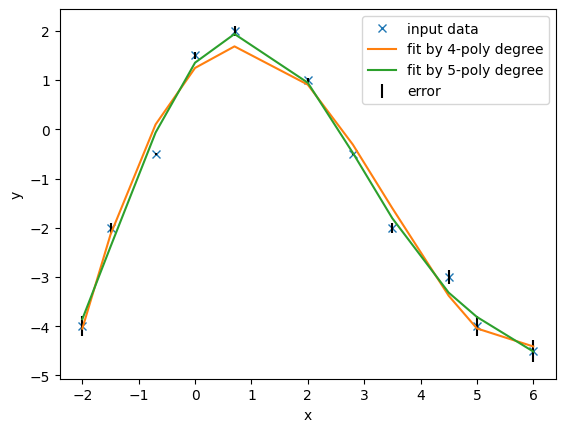

In [220]:
# plot
plt.plot(x,y, "x", label="input data")
plt.errorbar(x, y, yerr = abs(y)*0.05, fmt="none", ecolor="black", label="error")
for i in range(4, 6):
    plt.plot(x,cheb_coefs(i), label = f"fit by {i}-poly degree")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

In [ ]:
# tests for myself
